In [1]:
# importing required libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading dataset
df = pd.read_csv('/content/Heart_pre.csv')

In [4]:
# make a copy of data
df=df.copy()

In [5]:
# run all the data
df
# run the first 5 rows
df.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,Female,168.0,62.0,110.0,80.0,normal,normal,True,True,False,0
1,1,20228.0,Male,156.0,85.0,140.0,90.0,well above normal,normal,True,True,False,1
2,2,18857.0,Male,165.0,64.0,130.0,70.0,well above normal,normal,True,True,True,1
3,3,17623.0,Female,169.0,82.0,150.0,100.0,normal,normal,True,True,False,1
4,4,17474.0,Male,156.0,56.0,100.0,60.0,normal,normal,True,True,True,0


In [6]:
# get number of rows and columns
df.shape

(70000, 13)

In [7]:
# get attribute names
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
# get information about a dataset (dtype, non-null values, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   age          69977 non-null  float64
 2   gender       69965 non-null  object 
 3   height       69971 non-null  float64
 4   weight       69968 non-null  float64
 5   ap_hi        69977 non-null  float64
 6   ap_lo        69973 non-null  float64
 7   cholesterol  69969 non-null  object 
 8   gluc         69971 non-null  object 
 9   smoke        69978 non-null  object 
 10  alco         69962 non-null  object 
 11  active       69980 non-null  object 
 12  cardio       70000 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 6.9+ MB


In [10]:
# detect missing values
df.isna().sum()

,0
Unnamed: 0,0
age,23
gender,35
height,29
weight,32
ap_hi,23
ap_lo,27
cholesterol,31
gluc,29
smoke,22


In [11]:
# Summary statistics
df.describe() # only for numerical variables
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,70000.0,34999.500000,20207.403759,0.0,17499.75,34999.5,52499.25,69999.0
age,69977.0,19468.755505,2467.361127,10798.0,17664.00,19703.0,21327.00,23713.0
height,69971.0,164.359392,8.210368,55.0,159.00,165.0,170.00,250.0
weight,69968.0,74.206027,14.395954,10.0,65.00,72.0,82.00,200.0
ap_hi,69977.0,128.816540,154.036338,-150.0,120.00,120.0,140.00,16020.0
ap_lo,69973.0,96.635645,188.508610,-70.0,80.00,80.0,90.00,11000.0
cardio,70000.0,0.499700,0.500003,0.0,0.00,0.0,1.00,1.0


In [12]:
# correlation matrix

# error here tips.corr()

import pandas as pd

# Assuming 'tips' is your DataFrame
# Select only numeric columns
numeric_tips = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
correlation_matrix = numeric_tips.corr()

print(correlation_matrix)





            Unnamed: 0       age    height    weight     ap_hi     ap_lo  \
Unnamed: 0    1.000000  0.003465 -0.003048 -0.001713  0.003368 -0.002526   
age           0.003465  1.000000 -0.081447  0.053746  0.020770  0.017649   
height       -0.003048 -0.081447  1.000000  0.290879  0.005462  0.006066   
weight       -0.001713  0.053746  0.290879  1.000000  0.030708  0.043709   
ap_hi         0.003368  0.020770  0.005462  0.030708  1.000000  0.016083   
ap_lo        -0.002526  0.017649  0.006066  0.043709  0.016083  1.000000   
cardio        0.003800  0.238210 -0.010836  0.181636  0.054458  0.065738   

              cardio  
Unnamed: 0  0.003800  
age         0.238210  
height     -0.010836  
weight      0.181636  
ap_hi       0.054458  
ap_lo       0.065738  
cardio      1.000000  


gender
Female    3
Male      2
Name: count, dtype: int64


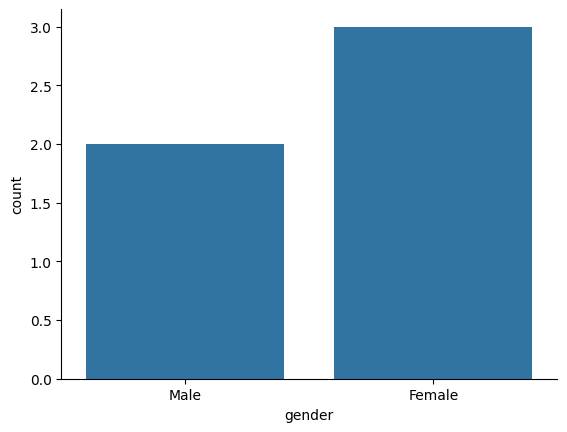

In [16]:
# data visualization
# Apsolute values - the number of records

sns.countplot(x='gender', data=df)
sns.despine() # no top and right axes spine

print(df.gender.value_counts())

<Axes: xlabel='count', ylabel='age'>

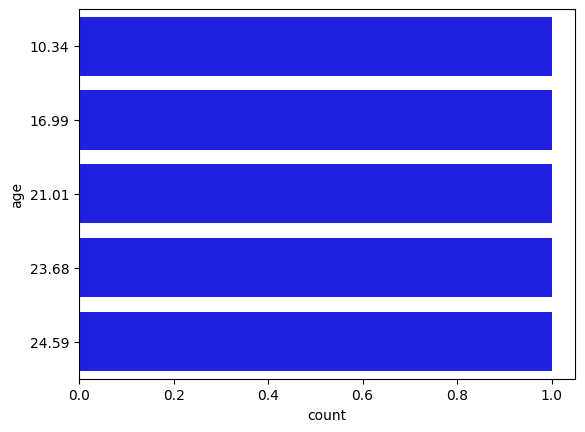

In [17]:
# change orientation, use same color for both label
sns.countplot(y='age', data=df, color='b')

<Axes: xlabel='gender', ylabel='count'>

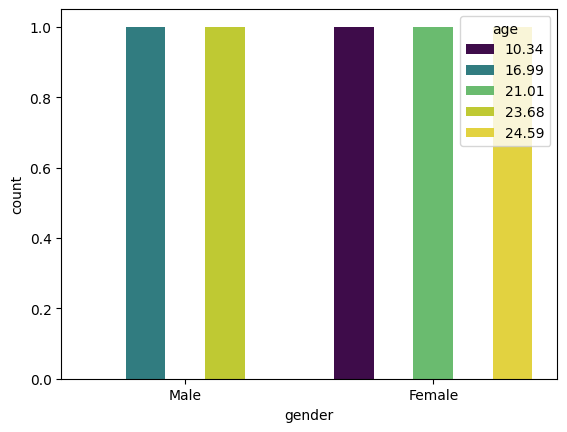

In [18]:
# show value counts for two categorical variables
sns.countplot(x='gender', data=df, hue='age', palette='viridis')

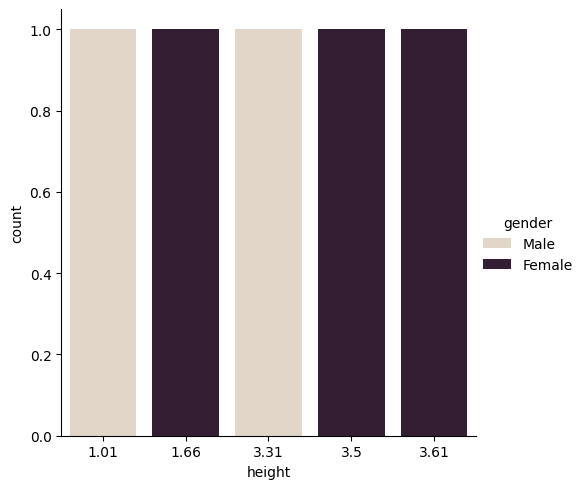

In [19]:
# show value counts for two categorical variables
sns.catplot(x='height', data=df, hue='gender', palette='ch:.25', kind='count')

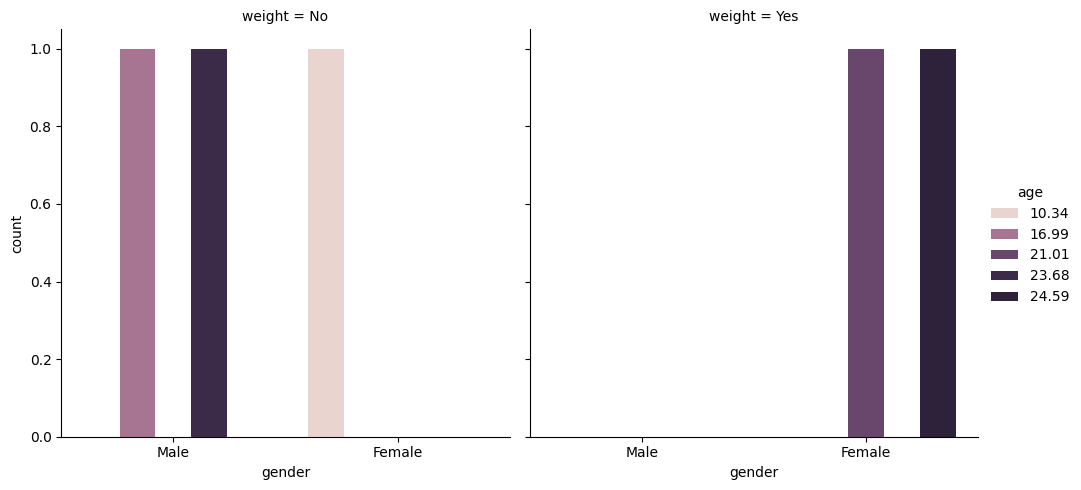

In [20]:
# facet along the columns to show a third categorical variable
sns.catplot(x='gender', hue='age', col='weight', data=df, kind='count')

height
1.01    20.0
1.66    20.0
3.50    20.0
3.31    20.0
3.61    20.0
Name: proportion, dtype: float64


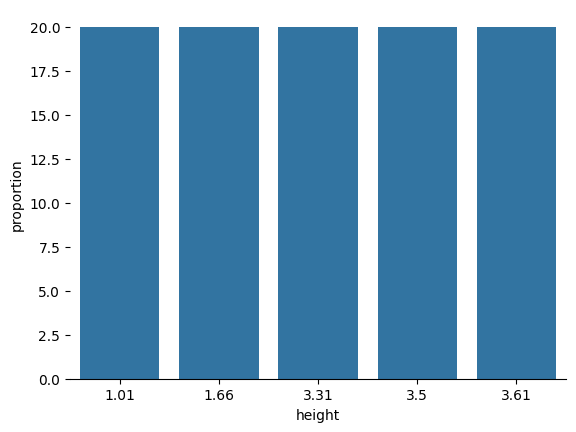

In [22]:
#bar plot
# Relative values - the percentage of records
perc=df['height'].value_counts(normalize=True)*100
print(perc)
sns.barplot(x=perc.index, y=perc, data=df)
sns.despine(left='True') # no top, left and right axes spine

<ipython-input-24-b21db1b94fe2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.height, ax=axes[0,0]).set_title('Heart Rate distribution')
<ipython-input-24-b21db1b94fe2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.height, bins=50, color='r', ax=axes[0,1]).set_title('Heart Rate distr

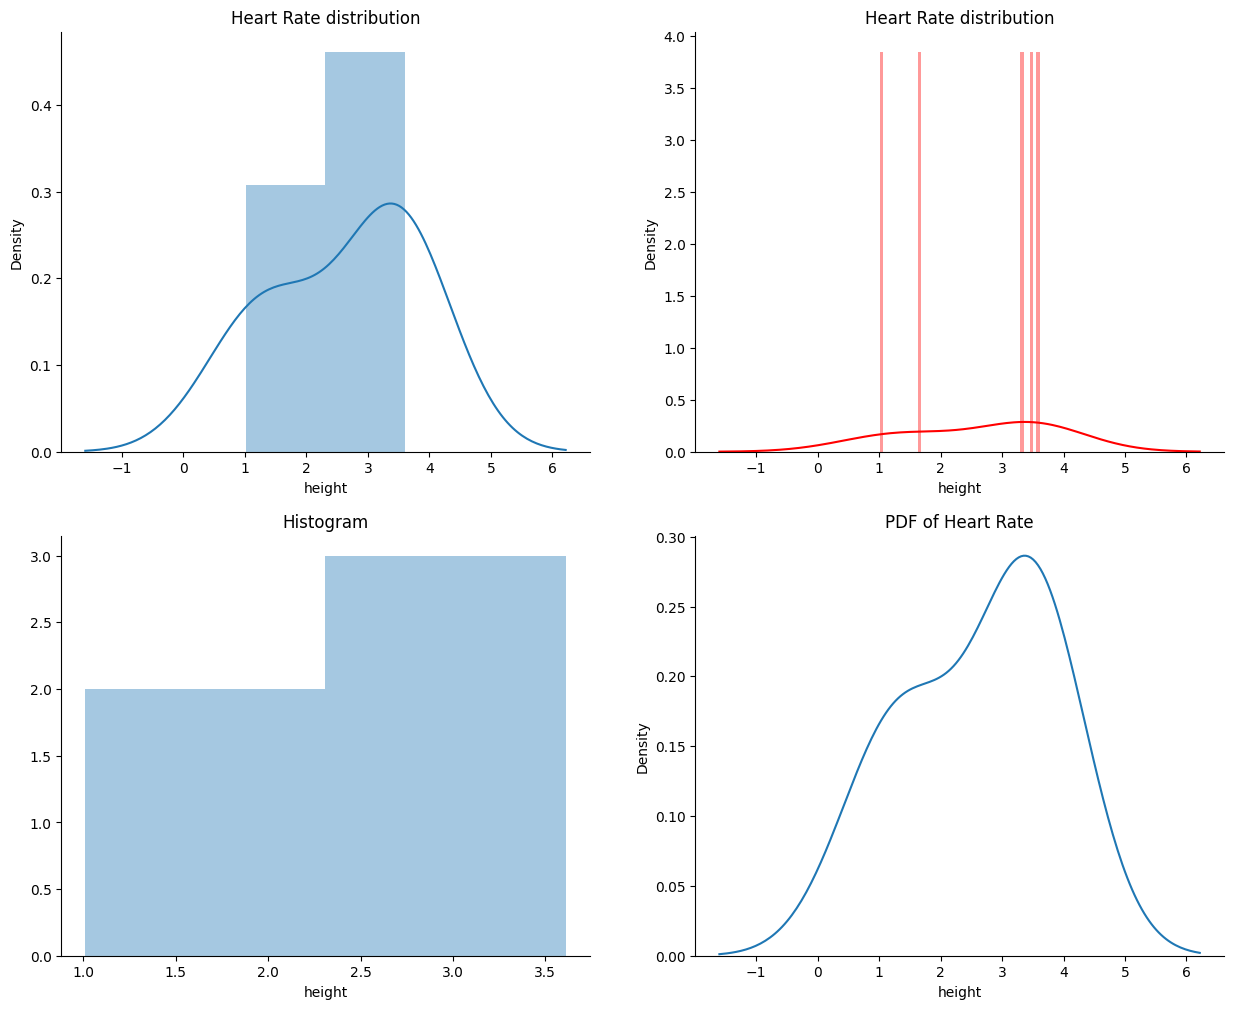

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs

# histogram and density function, set title
sns.distplot(df.height, ax=axes[0,0]).set_title('Heart Rate distribution')

#set number of bins and color, set title
sns.distplot(df.height, bins=50, color='r', ax=axes[0,1]).set_title('Heart Rate distribution')

# only histogram, without density function, set title
sns.distplot(df.height, kde=False, ax=axes[1,0]).set_title('Histogram')

# only density function, without histogram, set title
sns.distplot(df.height, hist=False, ax=axes[1,1]).set_title('PDF of Heart Rate')
sns.despine() # no top and right axes spine

<ipython-input-26-a68f01d6b7b9>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.height, shade=True, color='purple', legend=False, ax=axes[1]).set_title('PDF of Heart')


Text(0.5, 1.0, 'PDF of Heart')

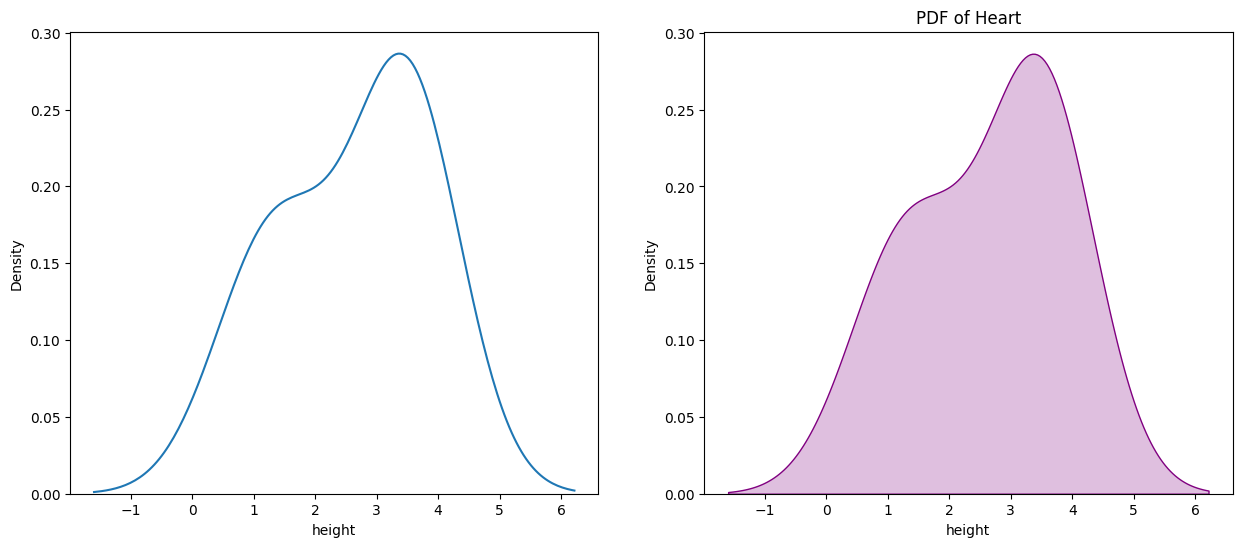

In [26]:
#kde plot
fig, axes = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs

# simple density function
sns.kdeplot(df.height, ax=axes[0])

# filled area under the curve, set color, remove legend, set title
sns.kdeplot(df.height, shade=True, color='purple', legend=False, ax=axes[1]).set_title('PDF of Heart')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Heart outliers')

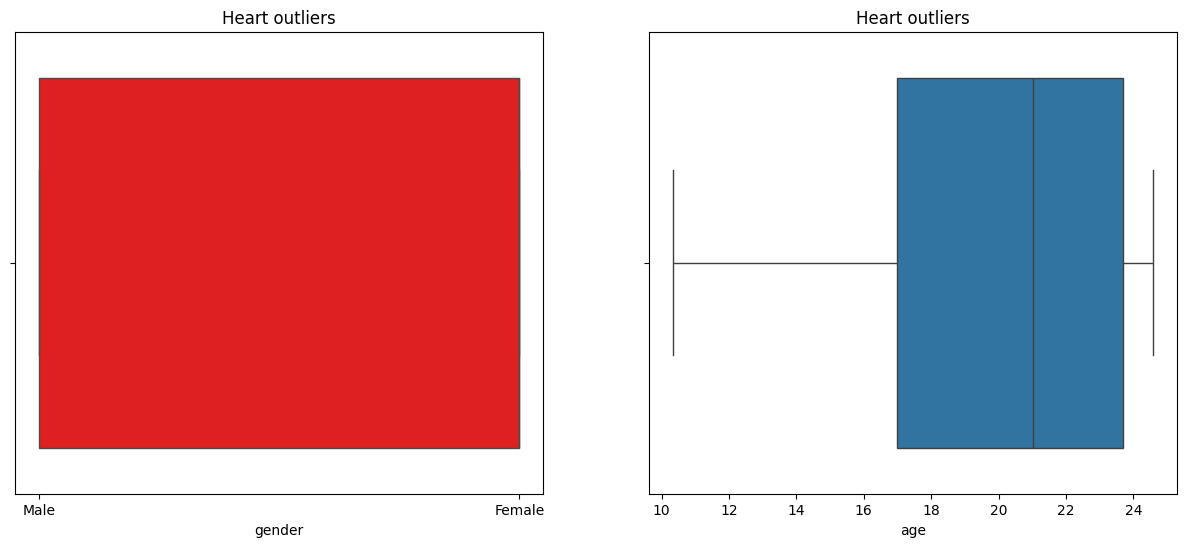

In [27]:
#box plot
# detect the outliers

fig, axes = plt.subplots(1, 2,figsize=(15,6)) # plot 2 graphs

# use red color, set title
sns.boxplot(x='gender', data=df, color='red', ax=axes[0]).set(title='Heart outliers')

# change orientation, set title
sns.boxplot(x='age', data=df, orient='v', ax=axes[1]).set_title('Heart outliers')

In [32]:
df[df.height>=40]

,gender,age,height,weight,ap_hi,ap_lo,size


In [34]:
df[df.height>=6]

,gender,age,height,weight,ap_hi,ap_lo,size


<Axes: ylabel='height'>

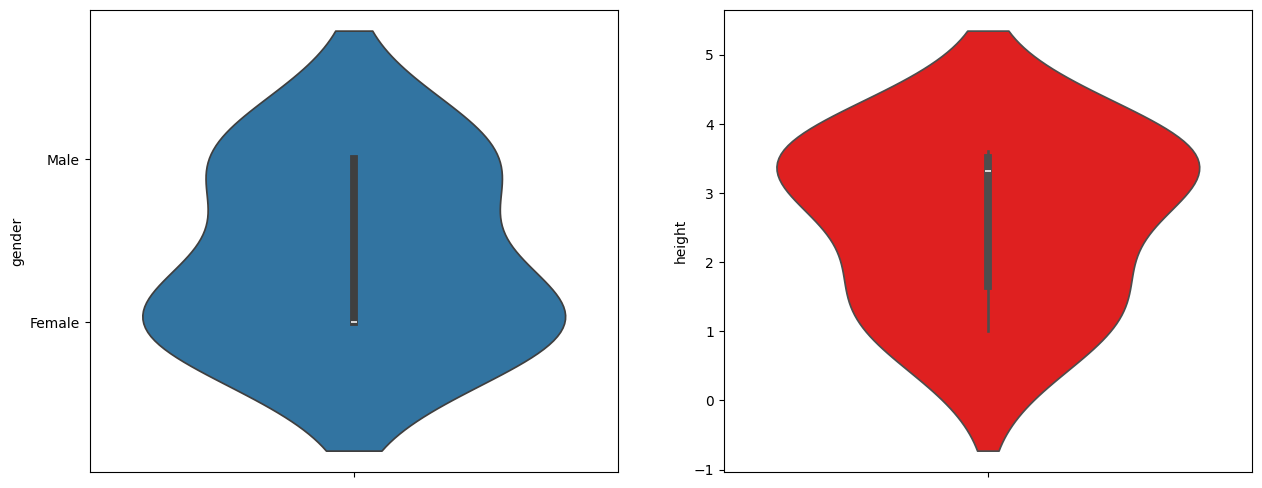

In [37]:
#violin plot
fig, axes = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs

# single horizontal violinplot
sns.violinplot(df.gender, ax=axes[0])

# change orientation, set color
sns.violinplot(df.height, orient='v', color='red', ax=axes[1])

[Text(0.5, 0, 'X axis- height'),
 Text(0, 0.5, 'Y axis - weight'),
 Text(0.5, 1.0, 'Line plot - height vs. weight')]

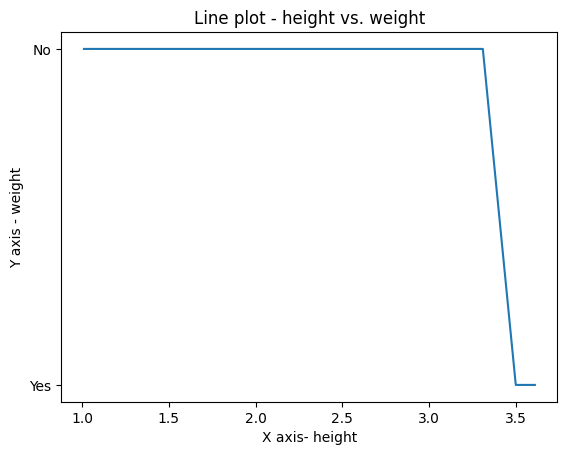

In [38]:
# line plot with confidence interval, set axes and title
sns.lineplot(x='height', y='weight', data=df).set(xlabel='X axis- height', ylabel='Y axis - weight', title='Line plot - height vs. weight')

<ipython-input-39-32aa11a1adb0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(x='height', y='weight', hue='gender', data=df, err_style='bars', ci=68)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


<Axes: xlabel='height', ylabel='weight'>

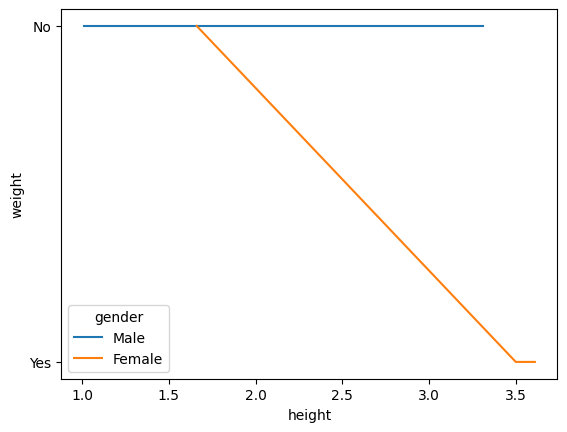

In [39]:
# show error bars and plot the standard error
sns.lineplot(x='height', y='weight', hue='gender', data=df, err_style='bars', ci=68)

<Axes: xlabel='gender', ylabel='age'>

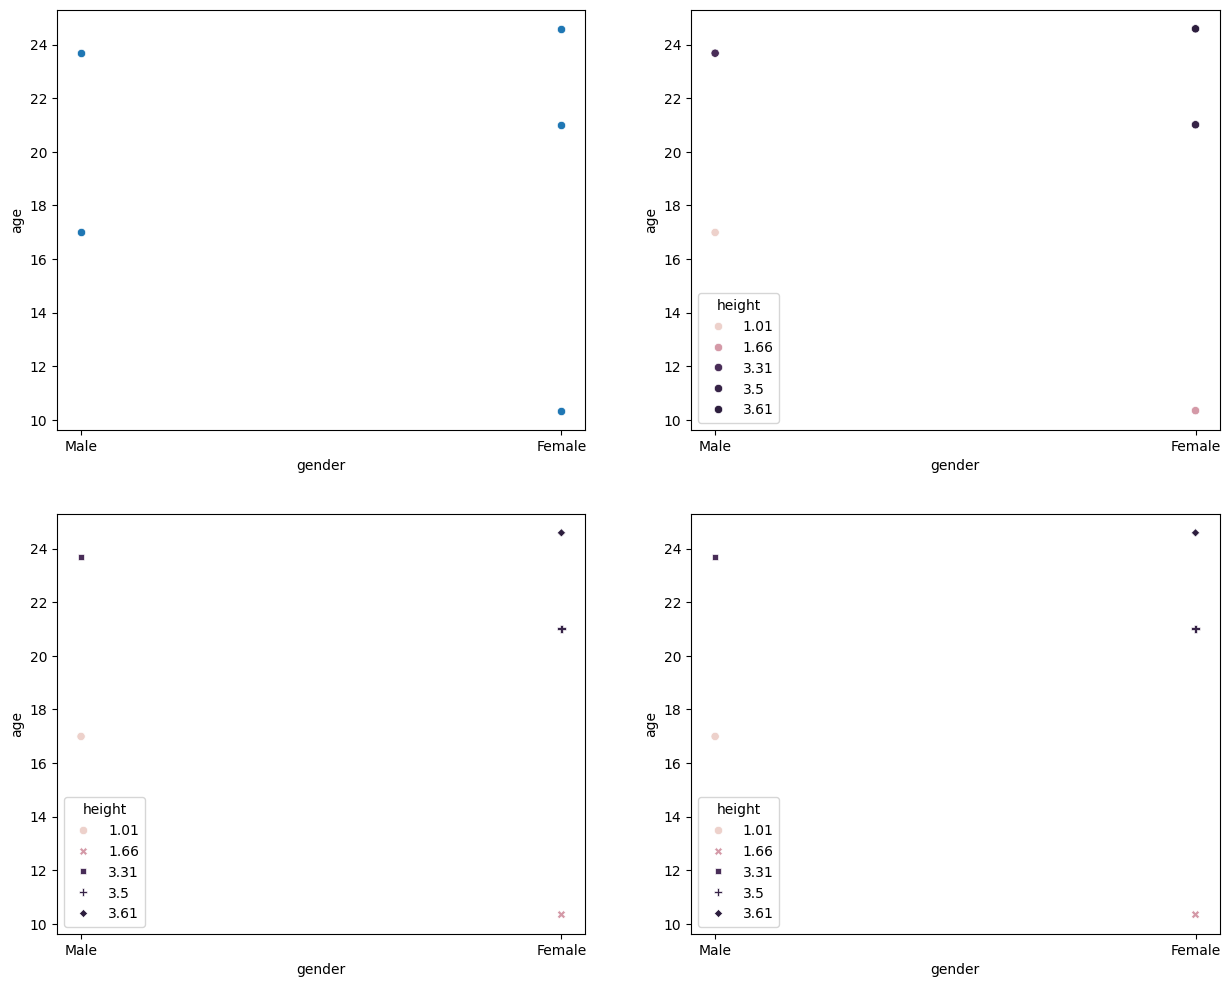

In [40]:
#scatter plot
fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs

# simple scatter plot between two variables
sns.scatterplot(x='gender', y='age', data=df, ax=axes[0,0])

# group by time and show the groups with different colors
sns.scatterplot(x ='gender', y ='age', data = df, hue= 'height', ax=axes[0,1])

# variable time by varying both color and marker
sns.scatterplot(x ='gender', y ='age', data = df, hue='height', style= 'height', ax=axes[1,0])

# vary colors and markers to show two different grouping variables
sns.scatterplot(x = 'gender', y = 'age', hue= 'height', style= 'height', data = df)

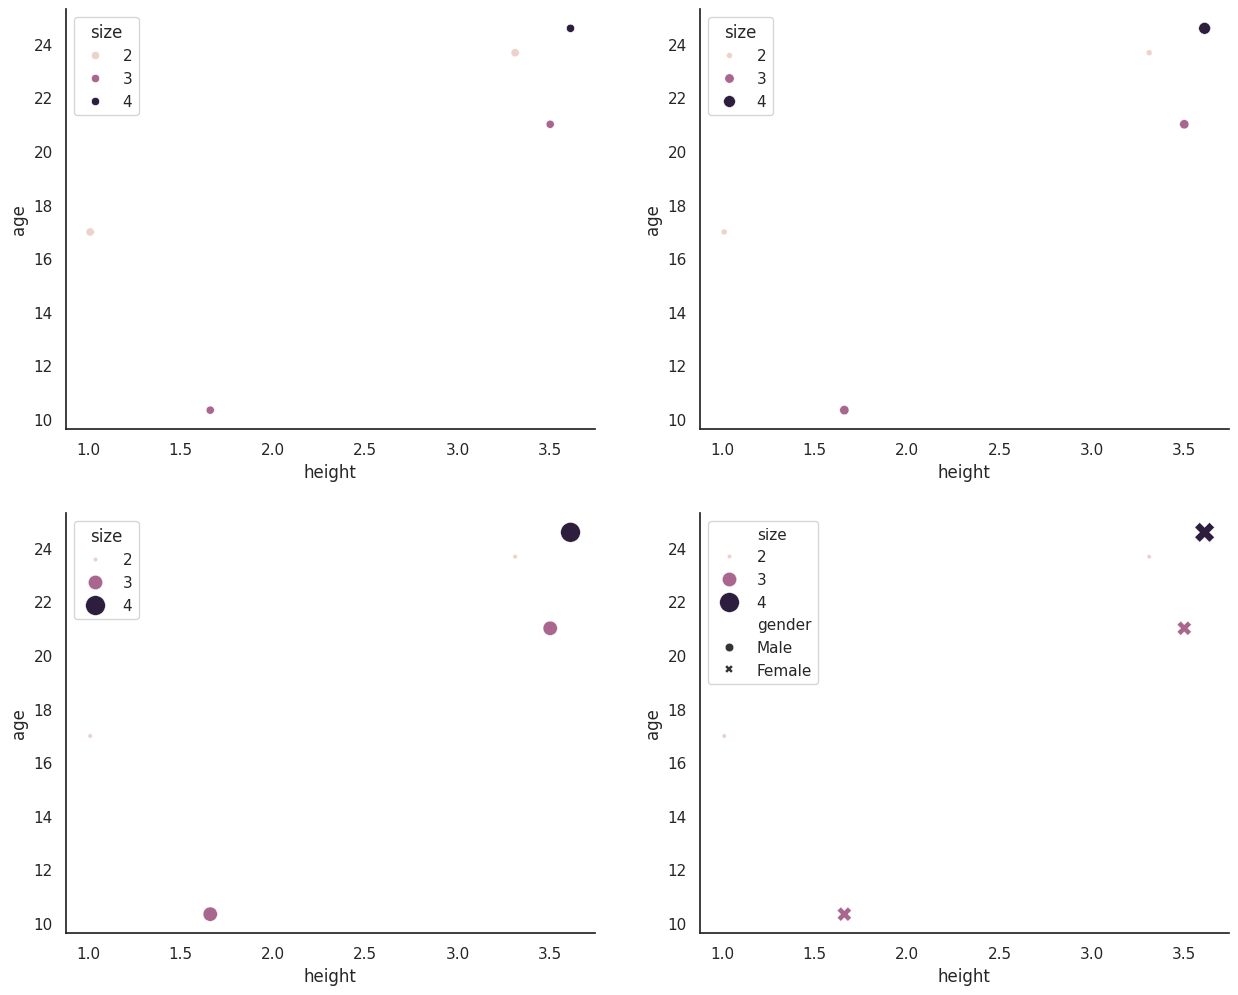

In [43]:
sns.set(style='white') #set background

fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs

# vary colors to show one grouping variable-size
sns.scatterplot(x='height', y='age', data=df, hue='size', ax=axes[0,0])

# quantitative variable-size by varying the size of the points
sns.scatterplot(x='height', y='age', data=df, hue='size', size='size', ax=axes[0,1])

# set the minimum and maximum point size and show all sizes in legend
sns.scatterplot(x='height', y='age', data=df, hue='size', size='size', sizes=(10,200), ax=axes[1,0])

# vary colors and markers to show two different grouping variables -size,sex
sns.scatterplot(x='height', y='age', data=df, hue='size', size='size', style='gender', sizes=(10,200), ax=axes[1,1])
sns.despine()

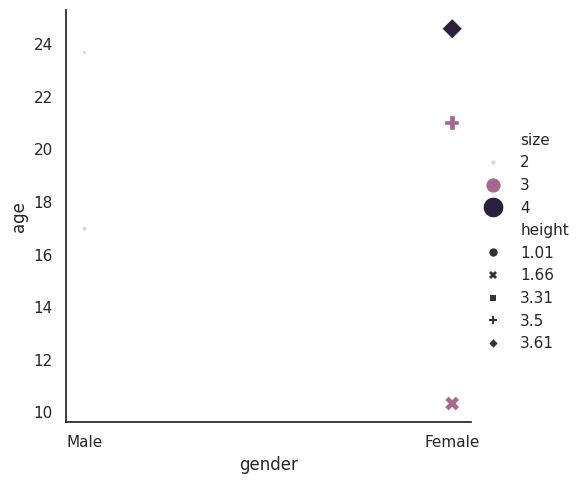

In [47]:
# how could we use relplot instead of scatter plot

#sns.scatterplot(x='total_bill', y='tip', data=tips, hue='size', size='size', style='sex', sizes=(10,200))
sns.relplot(x='gender', y='age', data=df, hue='size', size='size', style='height', sizes=(10,200))

In [49]:
sns.set(style='whitegrid') # set background for following graphs

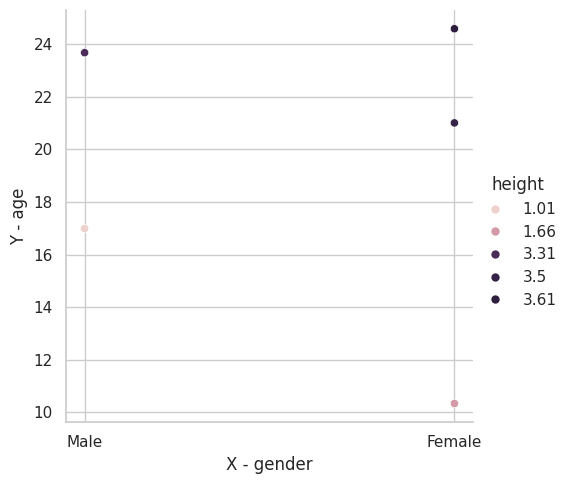

In [50]:
# draw a single facet, set axes
sns.relplot(x='gender', y='age', hue='height', data = df).set(xlabel='X - gender', ylabel='Y - age')

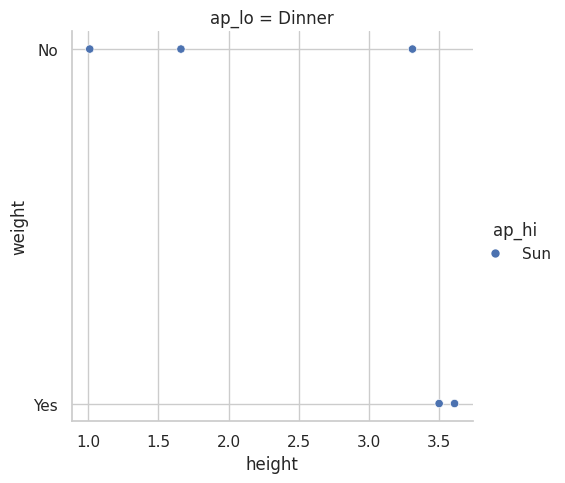

In [52]:
# facet on the columns with another variable
sns.relplot(x='height', y='weight', hue='ap_hi', col='ap_lo', data = df)

In [57]:
#joint plot
sns.set(style='white') # set background and palette for following graphs

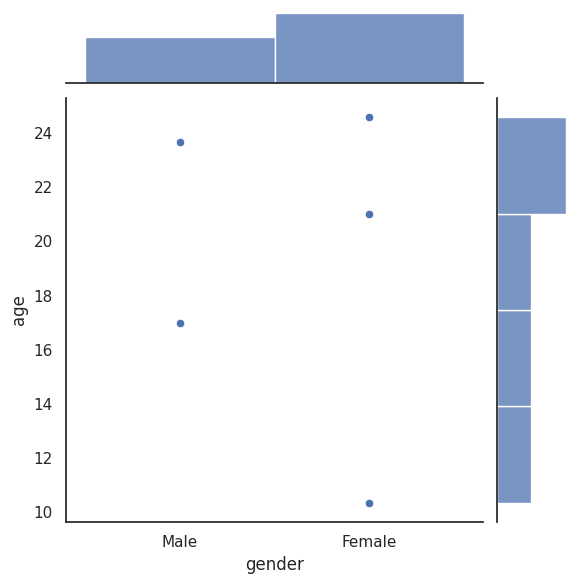

In [58]:
# scatterplot with marginal histograms
sns.jointplot(x='gender', y='age', data=df)


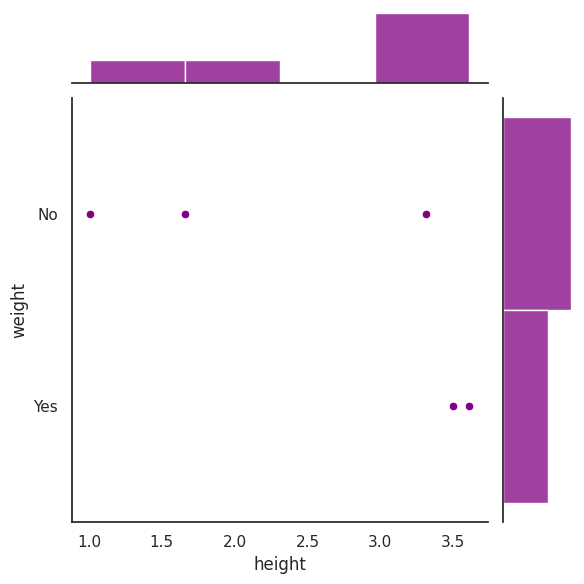

In [69]:
# replace the scatterplot with “hexbin” plot - shows the counts of observations that fall within hexagonal bins
sns.jointplot(x='height', y='weight', data=df, kind='scatter', color='purple')

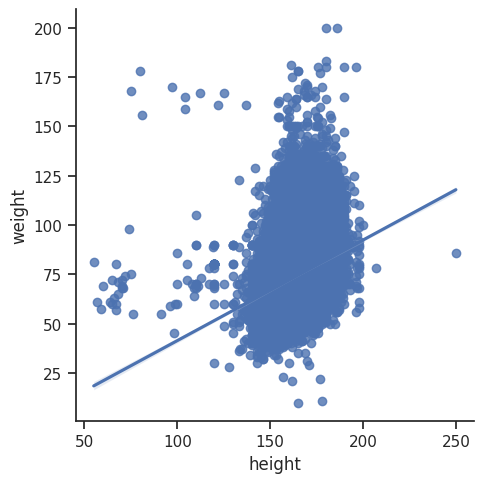

In [80]:
#LM plot
sns.set(style='ticks')

# simple linear relationship between two variables
sns.lmplot(x='height', y='weight', data=df)

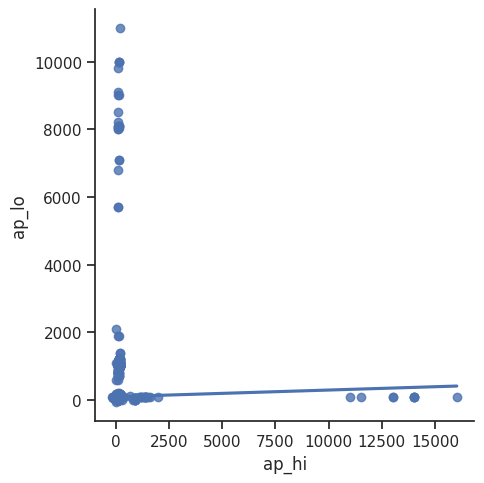

In [82]:
# regression line without confidence interval
sns.lmplot(x='ap_hi', y='ap_lo', data=df, ci=None)

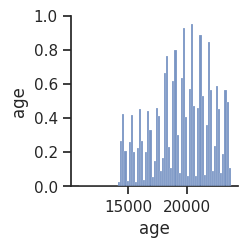

In [88]:
# select wanted variables
sns.pairplot(df[['gender','age']])

<Axes: xlabel='gender', ylabel='age'>

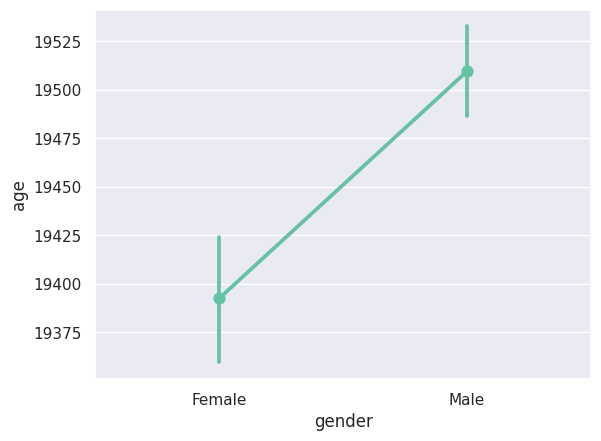

In [90]:
#point plot
sns.set(style='darkgrid',palette='Set2') # set background and palette

# grouped by a categorical variable
sns.pointplot(x='gender', y='age', data=df)


<ipython-input-95-54539f20da26>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='gender', y='age', data=df, ci='sd')


<Axes: xlabel='gender', ylabel='age'>

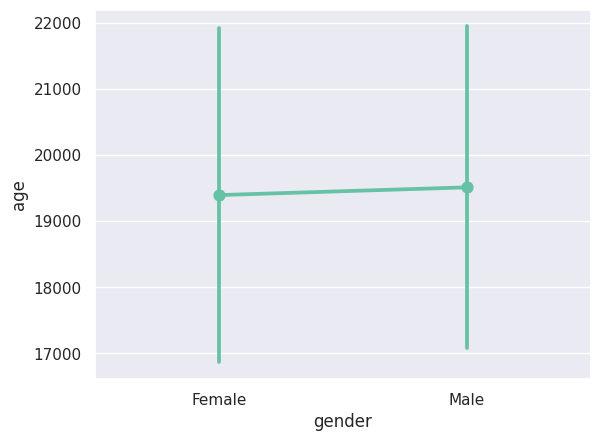

In [95]:
# show standard deviation of observations instead of a confidence interval
sns.pointplot(x='gender', y='age', data=df, ci='sd')